  # JOINING DATA
  (Join the data from Part 1 with the data from Part 2 to create a new dataframe.)

The process flow is as follows:
  1. Import library required 
  2. Load each dataframe saved from Part 1 and 2
  3. Join the loaded dataframes
  4. Do quick EDA
  5. Use data Visualization to explore data
  6. Create SQLite database and store the data collected on the POIs

In [105]:
# Importing the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

##### LOAD DATAFRAMES 

In [106]:
# Load Citybike dataframe
data_cb = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\city_bike_df.csv')
data_cb.head()

,Unnamed: 0,Station Name,Latitude,Longitude,Total Bikes
0,0,PARVIS ROTTERDAM,50.637709,3.077478,20
1,1,ROMARIN,50.645430,3.075116,27
2,2,RUE CHAMBORD,50.629720,3.133873,0
3,3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12
4,4,FAUBOURG D'ARRAS,50.614052,3.062195,16


In [107]:
# Create a new column concatenating latitude and longitude into a comma-separated string
data_cb['ll'] = data_cb['Latitude'].astype(str) + ',' + data_cb['Longitude'].astype(str)
data_cb.head(7) # View the dataframe with the new column 'll' added.

,Unnamed: 0,Station Name,Latitude,Longitude,Total Bikes,ll
0,0,PARVIS ROTTERDAM,50.637709,3.077478,20,"50.637709,3.077478"
1,1,ROMARIN,50.645430,3.075116,27,"50.64543,3.075116"
2,2,RUE CHAMBORD,50.629720,3.133873,0,"50.62972,3.133873"
3,3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12,"50.6875,3.1585592"
4,4,FAUBOURG D'ARRAS,50.614052,3.062195,16,"50.614052,3.062195"
5,5,LECLERC,50.628990,3.043307,28,"50.62899,3.043307"
6,6,BUISSON,50.656487,3.088004,16,"50.656487,3.088004"


In [108]:
# Dropping irrelevant columns or create a new dataframe to include relevant columns

# Create a new dataframe with relevant columns
data_cb_x = data_cb[['Station Name', 'Latitude', 'Longitude', 'Total Bikes', 'll']]

data_cb_x

,Station Name,Latitude,Longitude,Total Bikes,ll
0,PARVIS ROTTERDAM,50.637709,3.077478,20,"50.637709,3.077478"
1,ROMARIN,50.645430,3.075116,27,"50.64543,3.075116"
2,RUE CHAMBORD,50.629720,3.133873,0,"50.62972,3.133873"
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12,"50.6875,3.1585592"
4,FAUBOURG D'ARRAS,50.614052,3.062195,16,"50.614052,3.062195"
...,...,...,...,...,...
284,PLACE PHILIPPE LEBON,50.627890,3.062090,18,"50.62789,3.06209"
285,VERDUN,50.638126,3.102310,0,"50.638126,3.10231"
286,COLLEGE LAVOISIER,50.641834,3.022364,0,"50.641834,3.022364"
287,RUE CORNEILLE,50.623795,3.144815,14,"50.623795,3.144815"


In [109]:
data_cb_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station Name  289 non-null    object 
 1   Latitude      289 non-null    float64
 2   Longitude     289 non-null    float64
 3   Total Bikes   289 non-null    int64  
 4   ll            289 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 11.4+ KB


In [110]:
# Save the DataFrame as a CSV file
data_cb_x.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\cb1_df.csv', index=False)

In [111]:
# Load foursquare dataframe
 
data_fsq = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\fsq1_df.csv')
data_fsq.head()

,Foursquare ID,Categories,Distance,Latitude,Longitude,Address,Country,Locality,ll
0,52580520498e7287e120ec20,"Café, Coffee Shop, Restaurant",817,50.633326,3.068203,151 rue de Paris,FR,Lille,"50.637709,3.077478"
1,5aec3daabed483002cddc5f1,"Bar, Café, Sandwich Spot",933,50.640054,3.065019,16 bis place du Lion d'Or,FR,Lille,"50.637709,3.077478"
2,54bfa53d498eab9b0dc63806,French Restaurant,796,50.636692,3.065591,72- 74 rue Pierre Mauroy,FR,Lille,"50.637709,3.077478"
3,4bf3de1bcad2c9286f359b99,"Bar, Brewery, French Restaurant",938,50.637617,3.063970,33 place du Théâtre,FR,Lille,"50.637709,3.077478"
4,5d37273d051c210007e9ed40,"Restaurant, Hotel",479,50.638964,3.070887,97 place Saint Hubert,FR,Lille,"50.637709,3.077478"


In [112]:
# Checking uniquness of columns
data_fsq.nunique()

Foursquare ID    742
Categories       255
Distance         929
Latitude         722
Longitude        722
Address          704
Country            1
Locality          38
ll               289
dtype: int64

In [113]:
# View structure of DataFrame
data_fsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Foursquare ID  2890 non-null   object 
 1   Categories     2890 non-null   object 
 2   Distance       2890 non-null   int64  
 3   Latitude       2890 non-null   float64
 4   Longitude      2890 non-null   float64
 5   Address        2885 non-null   object 
 6   Country        2890 non-null   object 
 7   Locality       2858 non-null   object 
 8   ll             2890 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 203.3+ KB


In [114]:
# Load Yelp dataframe
data_yelp = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\yelp1.0_df.csv')
data_yelp.head()

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,ll
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,"50.63599,3.13566"
1,ULt6A2p3HVGKBktjSvUENA,"Coffee & Tea, Breakfast & Brunch",816.651871,50.633335,3.068176,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,"50.63599,3.13566"
2,HkBF2Uamk_QnqdOkDi4P5w,French,115.089029,50.636683,3.077263,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,"50.63599,3.13566"
3,8wp3JtP0iZkgrMmpmKtdqQ,"Steakhouses, Barbeque",628.168916,50.635500,3.069280,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,"50.63599,3.13566"
4,Yg0jsBdq8DynRkDlmksADQ,Greek,937.097725,50.642810,3.066900,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,"50.63599,3.13566"


In [115]:
# View Structure
data_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Yelp ID     10668 non-null  object 
 1   Categories  10668 non-null  object 
 2   Distance    10668 non-null  float64
 3   Latitude    10668 non-null  float64
 4   Longitude   10668 non-null  float64
 5   Address     10668 non-null  object 
 6   City        10668 non-null  object 
 7   Name        10668 non-null  object 
 8   Rating      10668 non-null  float64
 9   ll          10668 non-null  object 
dtypes: float64(4), object(6)
memory usage: 833.6+ KB


In [116]:
# View unique values of columns
data_yelp.nunique()

Yelp ID        1175
Categories      427
Distance      10453
Latitude       1120
Longitude      1132
Address        1147
City             56
Name           1096
Rating            9
ll                1
dtype: int64

##### JOIN DATAFRAMES

 The whole idea all the way from Part 1 was to have a common 
 column 'll' which the data from Part 1 and 2 can be joined'

In [262]:
# Write a function that checks that the common column 'll' is not missing from the dataframes to be joined

try:
    data_combined = pd.merge(data_yelp, data_fsq, on='ll', how='inner')
    data_combined = pd.merge(data_combined, data_cb_x, on='ll', how='inner')
    data_combined.head(4)
except KeyError as e:
    print(f"The column 'll' is missing in one of the DataFrames: {e}")

No missing column with 'll'

In [264]:
# Join the DataFrames using merge ( with 'll' column)

data_joined = pd.merge(data_yelp, data_fsq, on='ll', how='inner')
data_joined = pd.merge(data_combined, data_cb_x, on='ll', how='inner')
data_joined.head(4)

C:\Users\franc\AppData\Local\Temp\ipykernel_22012\2715845499.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Longitude_x', 'Latitude_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_joined = pd.merge(data_combined, data_cb_x, on='ll', how='inner')


,Yelp ID,Categories_x,Distance_x,Latitude_x,Longitude_x,Address_x,City,Name,Rating,ll,...,Country,Locality,Station Name_x,Latitude_x,Longitude_x,Total Bikes_x,Station Name_y,Latitude_y,Longitude_y,Total Bikes_y
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",...,FR,Villeneuve-d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",...,FR,Villeneuve-d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20


In [265]:
data_joined.tail(4)

,Yelp ID,Categories_x,Distance_x,Latitude_x,Longitude_x,Address_x,City,Name,Rating,ll,...,Country,Locality,Station Name_x,Latitude_x,Longitude_x,Total Bikes_x,Station Name_y,Latitude_y,Longitude_y,Total Bikes_y
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve-d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106679,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve-d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20


In [266]:
# View structure
data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106680 entries, 0 to 106679
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Yelp ID         106680 non-null  object 
 1   Categories_x    106680 non-null  object 
 2   Distance_x      106680 non-null  float64
 3   Latitude_x      106680 non-null  float64
 4   Longitude_x     106680 non-null  float64
 5   Address_x       106680 non-null  object 
 6   City            106680 non-null  object 
 7   Name            106680 non-null  object 
 8   Rating          106680 non-null  float64
 9   ll              106680 non-null  object 
 10  Foursquare ID   106680 non-null  object 
 11  Categories_y    106680 non-null  object 
 12  Distance_y      106680 non-null  int64  
 13  Latitude_y      106680 non-null  float64
 14  Longitude_y     106680 non-null  float64
 15  Address_y       106680 non-null  object 
 16  Country         106680 non-null  object 
 17  Locality  

In [267]:
# saving a copy of the combined dataframe
data_joined.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combined_df.csv')

##### PERFORM EXPLORATIVE DATA ANALYSIS (EDA)

##### Check type of Data

In [268]:
# Checking the types of data

data_joined.dtypes

Yelp ID            object
Categories_x       object
Distance_x        float64
Latitude_x        float64
Longitude_x       float64
Address_x          object
City               object
Name               object
Rating            float64
ll                 object
Foursquare ID      object
Categories_y       object
Distance_y          int64
Latitude_y        float64
Longitude_y       float64
Address_y          object
Country            object
Locality           object
Station Name_x     object
Latitude_x        float64
Longitude_x       float64
Total Bikes_x       int64
Station Name_y     object
Latitude_y        float64
Longitude_y       float64
Total Bikes_y       int64
dtype: object

In [269]:
data_joined.tail()

,Yelp ID,Categories_x,Distance_x,Latitude_x,Longitude_x,Address_x,City,Name,Rating,ll,...,Country,Locality,Station Name_x,Latitude_x,Longitude_x,Total Bikes_x,Station Name_y,Latitude_y,Longitude_y,Total Bikes_y
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve-d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20
106679,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,3.12229,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",...,FR,Villeneuve-d'Ascq,CHATELLENIE,50.63599,3.13566,20,CHATELLENIE,50.63599,3.13566,20


#### Drop irrelevant columns

In [272]:
data_joined_new = data_joined[['Yelp ID', 'Categories_x', 'Distance_x', 'Latitude_x', 'Longitude_x', 'Address_x', 'Foursquare ID', 'City', 'Name', 'Rating', 'll', 'Country', 'Station Name_x', 
                               'Total Bikes_x']]

data_joined_new 

,Yelp ID,Categories_x,Distance_x,Latitude_x,Latitude_x,Longitude_x,Longitude_x,Address_x,Foursquare ID,City,Name,Rating,ll,Country,Station Name_x,Total Bikes_x
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


##### Rename Columns

In [273]:
# Rename columns
data_joined_new = data_joined_new.rename(columns={"Categories_x": "Categories", "Distance_x": "Distance", "Latitude_x": "Latitude", "Longitude_x": "Longitude","Address_x": "Address", "Station Name_x": "Station Name", 
                               "Total Bikes_x": "Total Bikes" })
data_joined_new

,Yelp ID,Categories,Distance,Latitude,Latitude,Longitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [275]:
data_joined_new.shape

(106680, 16)

##### Check for duplicates

In [274]:
# Checking for duplicates
duplicate_rows_data_joined_new = data_joined_new[data_joined_new.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data_joined_new.shape)

number of duplicate rows:  (0, 16)


No duplicate rows

In [276]:
data_joined_new.count()

Yelp ID          106680
Categories       106680
Distance         106680
Latitude         106680
Latitude         106680
Longitude        106680
Longitude        106680
Address          106680
Foursquare ID    106680
City             106680
Name             106680
Rating           106680
ll               106680
Country          106680
Station Name     106680
Total Bikes      106680
dtype: int64

Just a quick confirmation of no duplicates

In [277]:
data_joined_jd = data_joined_new.copy()
data_joined_jd

,Yelp ID,Categories,Distance,Latitude,Latitude,Longitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [278]:
data_joined_jd.shape

(106680, 16)

In [279]:
# Drop duplicates
data_joined_jd = data_joined_jd.drop_duplicates()
data_joined_jd.tail()

,Yelp ID,Categories,Distance,Latitude,Latitude,Longitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.12229,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.12229,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.12229,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.12229,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106679,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.12229,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e8c28886d863e6679391ad7,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [280]:
data_joined_jd.count()

Yelp ID          106680
Categories       106680
Distance         106680
Latitude         106680
Latitude         106680
Longitude        106680
Longitude        106680
Address          106680
Foursquare ID    106680
City             106680
Name             106680
Rating           106680
ll               106680
Country          106680
Station Name     106680
Total Bikes      106680
dtype: int64

In [281]:
data_joined_new = data_joined_jd
data_joined_new

,Yelp ID,Categories,Distance,Latitude,Latitude,Longitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,50.63599,3.077348,3.13566,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.743024,50.639165,50.63599,3.122290,3.13566,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [282]:
del data_joined_jd

##### Check for Missing or Null values

In [283]:
# Checking for missing or null values.

print("\nMissing Values:")
print(data_joined_new.isnull().sum())   # Before dropping the values


Missing Values:
Yelp ID          0
Categories       0
Distance         0
Latitude         0
Latitude         0
Longitude        0
Longitude        0
Address          0
Foursquare ID    0
City             0
Name             0
Rating           0
ll               0
Country          0
Station Name     0
Total Bikes      0
dtype: int64


No missing or null values

In [287]:
# Round 'Distance, Latitude and Longitude' to 2 decimal places
data_joined_new['Distance'] = data_joined_new['Distance'].round(2)
data_joined_new['Latitude'] = data_joined_new['Latitude'].round(2)
data_joined_new['Longitude'] = data_joined_new['Longitude'].round(2)


In [422]:
data_joined_new.head()

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [289]:
data_joined_new.shape

(106680, 16)

In [290]:
# Save dataframe for the purpose of validation in sqlite

# saving a copy of the combined dataframe
data_joined_new.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\comb2_sql_df.csv')

In [291]:
data_joined_new.describe()

,Distance,Latitude,Latitude,Longitude,Longitude,Rating,Total Bikes
count,106680.000000,106680.000000,1.066800e+05,106680.000000,1.066800e+05,106680.000000,106680.0
mean,805.449962,50.648451,5.064000e+01,3.092110,3.140000e+00,3.856721,20.0
std,1018.942683,0.030844,4.187959e-11,0.048911,8.293405e-12,0.763045,0.0
min,3.150000,50.600000,5.064000e+01,2.980000,3.140000e+00,1.000000,20.0
25%,393.447500,50.630000,5.064000e+01,3.060000,3.140000e+00,3.500000,20.0
50%,716.150000,50.640000,5.064000e+01,3.070000,3.140000e+00,4.000000,20.0
75%,966.860000,50.660000,5.064000e+01,3.140000,3.140000e+00,4.500000,20.0
max,13697.080000,50.750000,5.064000e+01,3.230000,3.140000e+00,5.000000,20.0


I noticed duplicate columns

In [423]:
# Removing duplicate columns, then resave 
data_joined_new = data_joined_new.loc[:,~df.columns.duplicated()].copy()
data_joined_new

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106675,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106676,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106677,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
106678,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [424]:
data_joined_new.shape

(93700, 14)

In [425]:
data_joined_new.describe()

,Distance,Latitude,Longitude,Rating,Total Bikes
count,93700.000000,93700.000000,93700.000000,93700.000000,93700.0
mean,674.483888,50.641812,3.085430,3.891942,20.0
std,338.889068,0.022912,0.046135,0.671686,0.0
min,3.150000,50.600000,2.980000,2.000000,20.0
25%,378.630000,50.630000,3.060000,3.500000,20.0
50%,704.700000,50.640000,3.070000,4.000000,20.0
75%,956.250000,50.650000,3.120000,4.500000,20.0
max,1803.950000,50.700000,3.230000,5.000000,20.0


In [426]:
# Save dataframe for the purpose of validation in sqlite

# saving a copy of the combined dataframe
data_joined_new.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\comb2_sql_df.csv')

##### Detecting Outliers

<Axes: xlabel='Total Bikes'>

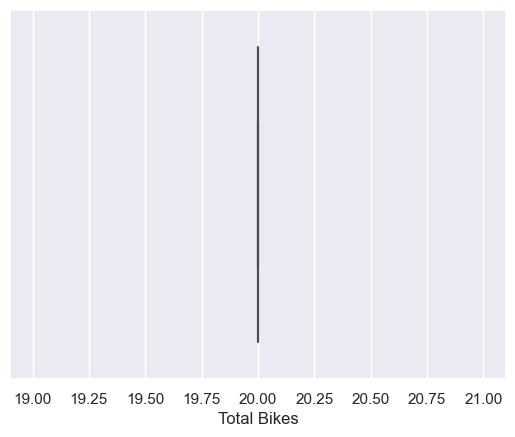

In [427]:
# Detecting Outliers in Total Bikes

sns.boxplot(x=data_joined_new['Total Bikes'])


<Axes: xlabel='Rating'>

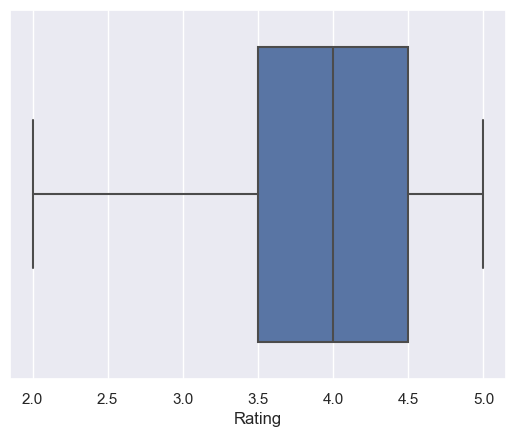

In [428]:
# Detecting Outliers in Rating
sns.boxplot(x=data_joined_new['Rating'])

<Axes: xlabel='Distance'>

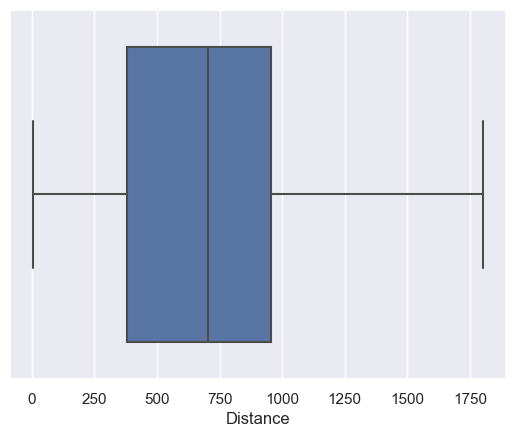

In [429]:
# Detecting Outliers in Distance
sns.boxplot(x=data_joined_new['Distance'])

In [430]:
# calculate the interquartile range (IQR)
Q1 = data_joined_new.quantile(0.25)
Q3 = data_joined_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Distance       577.62
Latitude         0.02
Longitude        0.06
Rating           1.00
Total Bikes      0.00
dtype: float64


C:\Users\franc\AppData\Local\Temp\ipykernel_22012\960802776.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_joined_new.quantile(0.25)
C:\Users\franc\AppData\Local\Temp\ipykernel_22012\960802776.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_joined_new.quantile(0.75)


Interpretation:

The code calculates the interquartile range (IQR) for each column in the DataFrame `data_joined_new`. 

Interpretation are as follows:

1. Distance: The IQR for the 'Distance' column is approximately 577.62. This means that the middle 50% of the data falls within a range of about 573.4125 units. In a box plot above, this represents the length of the box (the interquartile range).

2. Latitude: The IQR for the 'Latitude' column is approximately 0.02. This suggests that the middle 50% of latitude values fall within a range of about 0.02 degrees.

3. Longitude: The IQR for the 'Longitude' column is approximately 0.06. Similar to latitude, this indicates that the middle 50% of longitude values fall within a range of about 0.06 degrees.

4. Rating: The IQR for the 'Rating' column is 1.0. This means that the middle 50% of rating values have a range of 1.0. Since the Rating range from 1 to 5, the IQR suggests that the middle 50% of ratings fall within a range of 1 point.

5. Total Bikes: The IQR for the 'Total Bikes' column is 0.0, which means that the middle 50% of the data have the same values. There is no variability in this column within the middle 50% of the data. Suggesting little dispersion or spread in these values and potential a red flag, indicatind that the data is not capturing important distinctions or maybe an issue in the data collection or processing.

In summary, the IQR provides a measure of the spread or variability within each column of the dataframe. It helps identify the range in which the central 50% of data points lie, which is useful for identifying outliers or understanding the distribution of the dataframe.

In [431]:
data_joined_new = data_joined_new[~((data_joined_new < (Q1 - 1.5 * IQR)) |(data_joined_new > (Q3 + 1.5 * IQR))).any(axis=1)]
data_joined_new.shape

C:\Users\franc\AppData\Local\Temp\ipykernel_22012\1008659947.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_joined_new = data_joined_new[~((data_joined_new < (Q1 - 1.5 * IQR)) |(data_joined_new > (Q3 + 1.5 * IQR))).any(axis=1)]


(79940, 14)

Explanation of (79940, 14):

The first number (79940) represents the number of rows in the filtered DataFrame.

The second number (14) represents the number of columns in the filtered DataFrame.

In [434]:
# Locating where the outliers are:

# Calculate the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers_distance = (data_joined_new['Distance'] < lower_bound['Distance']) | (data_joined_new['Distance'] > upper_bound['Distance'])
outliers_latitude = (data_joined_new['Latitude'] < lower_bound['Latitude']) | (data_joined_new['Latitude'] > upper_bound['Latitude'])
outliers_longitude = (data_joined_new['Longitude'] < lower_bound['Longitude']) | (data_joined_new['Longitude'] > upper_bound['Longitude'])
outliers_rating = (data_joined_new['Rating'] < lower_bound['Rating']) | (data_joined_new['Rating'] > upper_bound['Rating'])
outliers_total_bikes = (data_joined_new['Total Bikes'] < lower_bound['Total Bikes']) | (data_joined_new['Total Bikes'] > upper_bound['Total Bikes'])

# Combine the outlier flags for all columns
outliers = outliers_distance | outliers_latitude | outliers_longitude | outliers_rating | outliers_total_bikes

# Remove rows containing outliers
# data_joined_new = data_joined_new[~outliers]

# Check the shape of the DataFrame after removing outliers
# filtered_shape = data_joined_new.shape


In [435]:
print(outliers_distance)
print('======================================')
print(outliers_latitude)
print('======================================')
print(outliers_longitude)
print('======================================')
print(outliers_rating)
print('======================================')
print(outliers_total_bikes)

0         False
1         False
2         False
3         False
4         False
          ...  
106675    False
106676    False
106677    False
106678    False
106679    False
Name: Distance, Length: 79940, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
106675    False
106676    False
106677    False
106678    False
106679    False
Name: Latitude, Length: 79940, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
106675    False
106676    False
106677    False
106678    False
106679    False
Name: Longitude, Length: 79940, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
106675    False
106676    False
106677    False
106678    False
106679    False
Name: Rating, Length: 79940, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
106675    False
106676    Fal

#### VISUALIZATION
Plot different features against one another (scatter), against frequency (histogram)

##### Bar

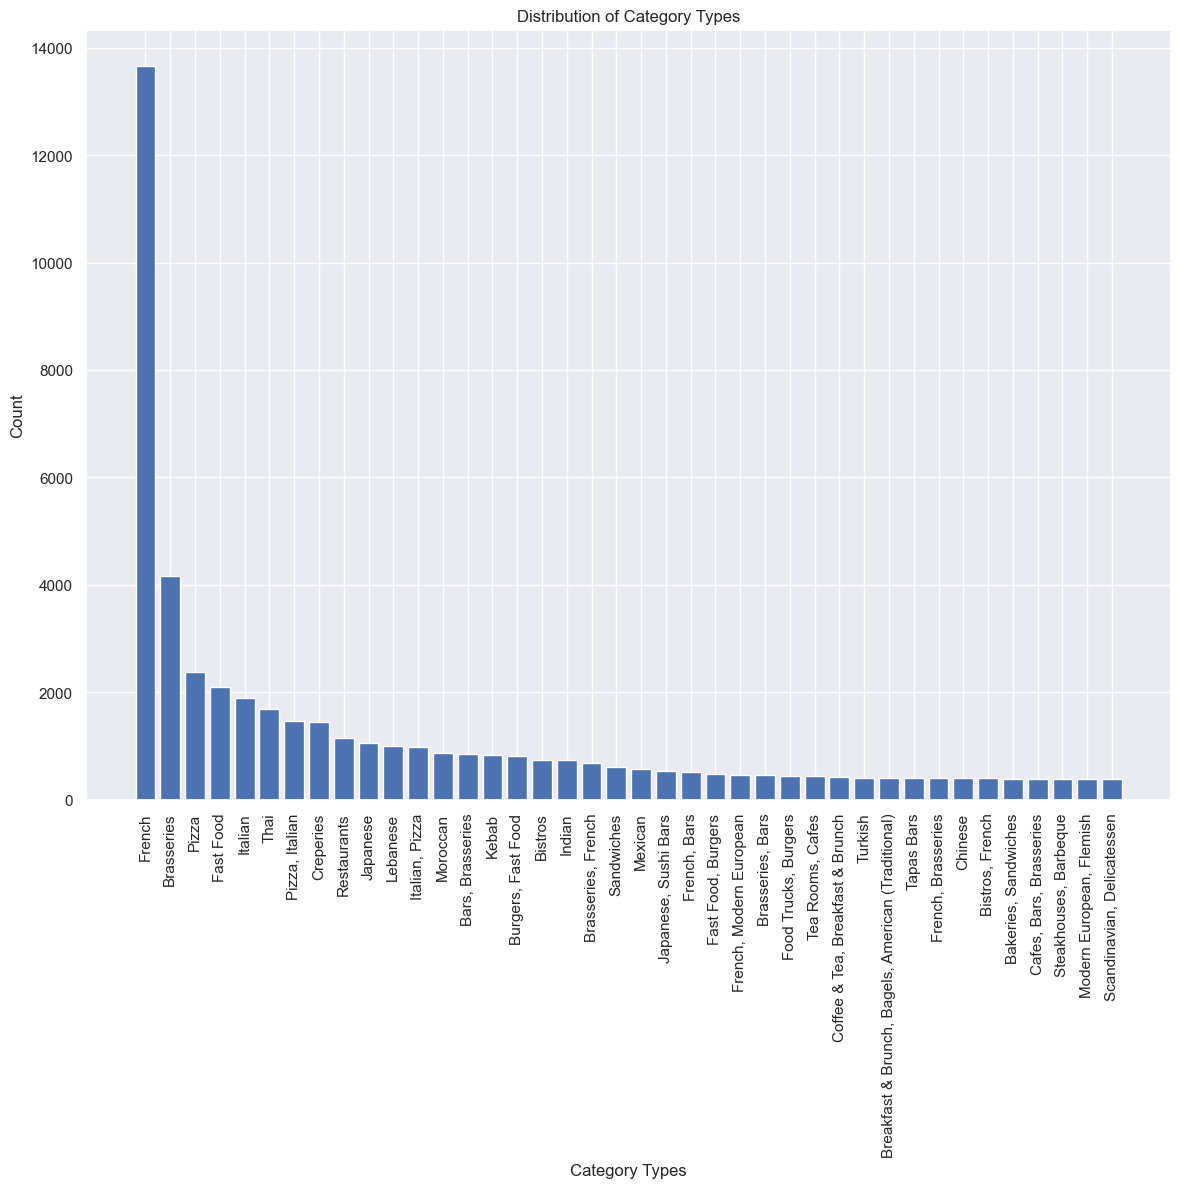

In [436]:
import matplotlib.pyplot as plt

# Count the occurrences of each establishment type
type_counts = data_joined_new['Categories'].value_counts().nlargest(40)

# Create a bar chart
plt.figure(figsize=(14, 10))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Category Types')
plt.ylabel('Count')
plt.title('Distribution of Category Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


The resulting bar chart provides a visual representation of the distribution of different establishment types (categories). Showing which categories are the most common or frequent based on their counts. This information is helpful for understanding the composition of the dataframe and to identify patterns or trends related to different types of establishments.

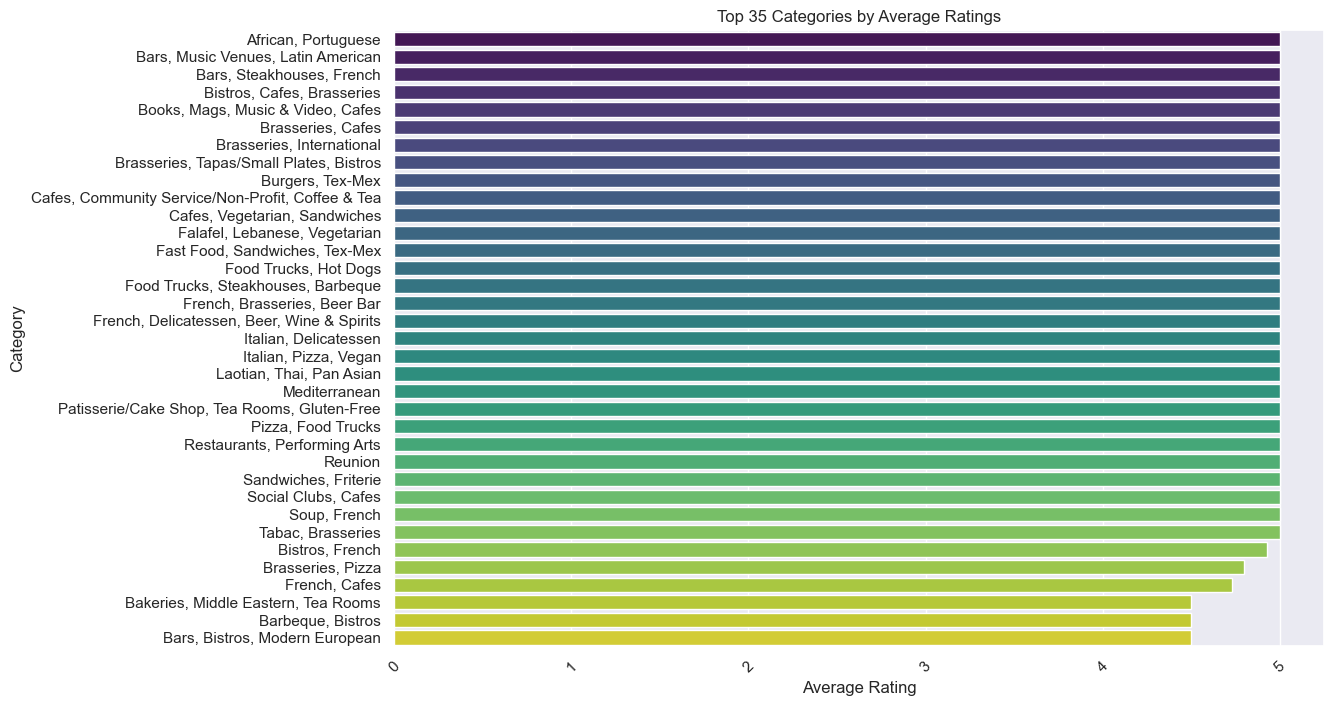

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the average ratings by category
avg_ratings_by_category = data_joined_new.groupby('Categories')['Rating'].mean().reset_index()

# Get the top 35 categories with the highest average ratings
top_n_categories = avg_ratings_by_category.nlargest(35, 'Rating')  

# Create a bar chart for the top 35 categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x='Rating', y='Categories', data=top_n_categories, palette='viridis')
plt.title('Top {} Categories by Average Ratings'.format(35))
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()



The bar chart displays the top 35 categories with the highest average ratings, this helps to identify which categories have the best average ratings. This can be useful for understanding which types of establishments or businesses tend to receive higher ratings of the dataset and can be used for various analytical and decision-making purposes.

##### Histogram

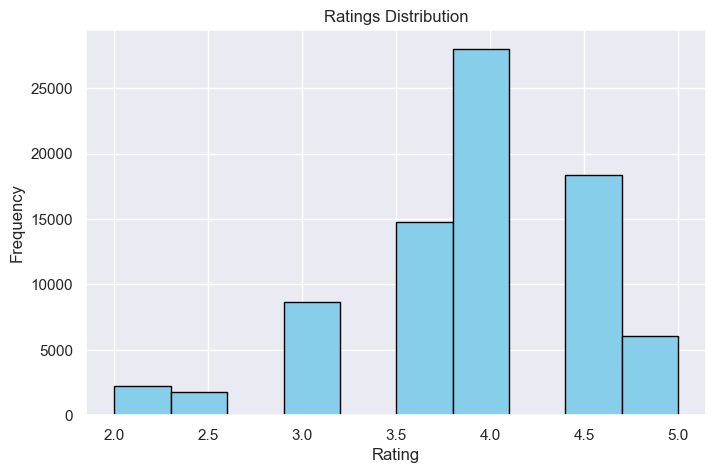

In [439]:
import matplotlib.pyplot as plt

# Create a histogram of ratings
plt.figure(figsize=(8, 5))
plt.hist(data_joined_new['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

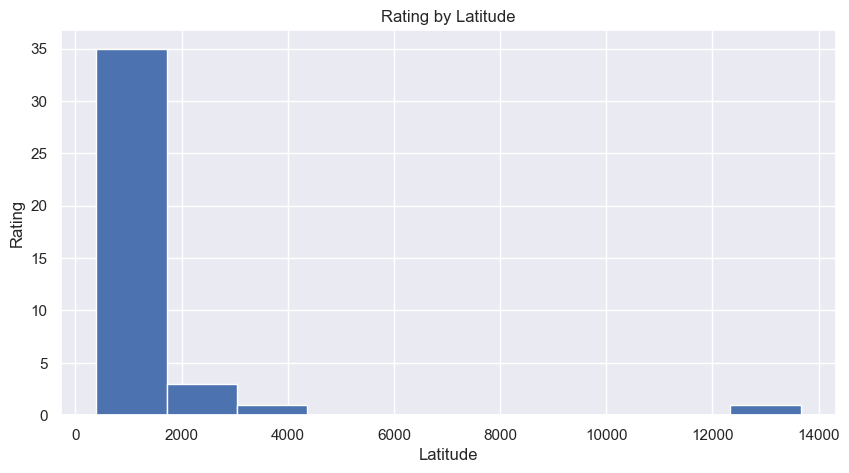

In [575]:
data_joined_new.Categories.value_counts().nlargest(40).plot(kind='hist', figsize=(10,5))
plt.title("Rating by Latitude")
plt.ylabel('Rating')
plt.xlabel('Latitude');


##### Heat Maps

C:\Users\franc\AppData\Local\Temp\ipykernel_22012\1197922111.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= data_joined_new.corr()


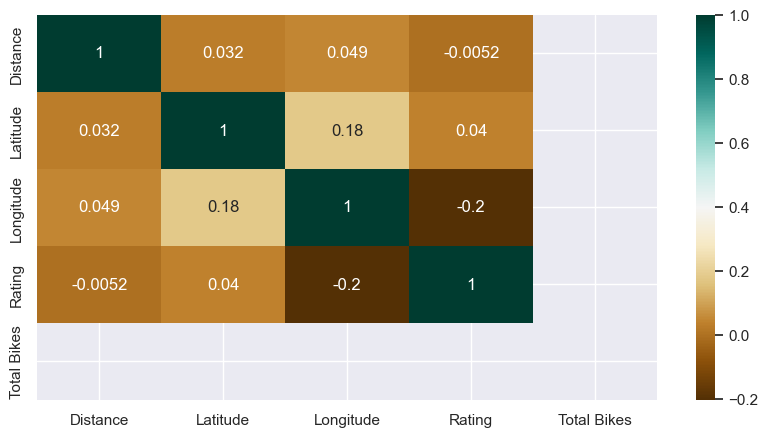

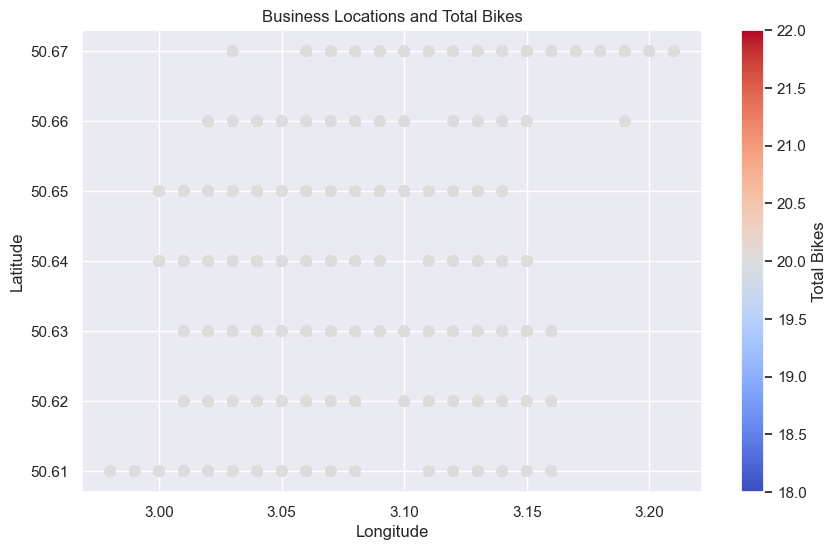

In [441]:
plt.figure(figsize=(10,5))
c= data_joined_new.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

import matplotlib.pyplot as plt

# Create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(data_joined_new['Longitude'], data_joined_new['Latitude'], c=data_joined_new['Total Bikes'], cmap='coolwarm', s=50)
plt.title('Business Locations and Total Bikes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Total Bikes')
plt.show()

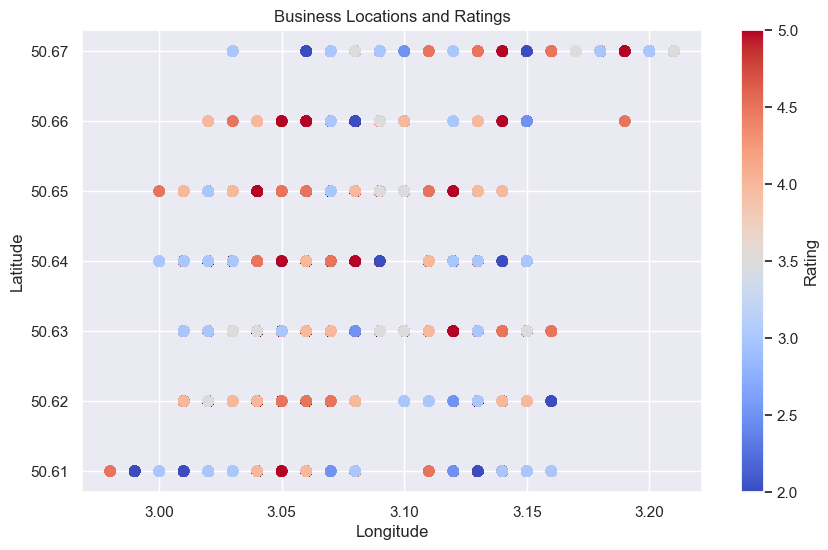

In [576]:
import matplotlib.pyplot as plt

# Create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(data_joined_new['Longitude'], data_joined_new['Latitude'], c=data_joined_new['Rating'], cmap='coolwarm', s=50)
plt.title('Business Locations and Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Rating')
plt.show()

##### Scatterplot

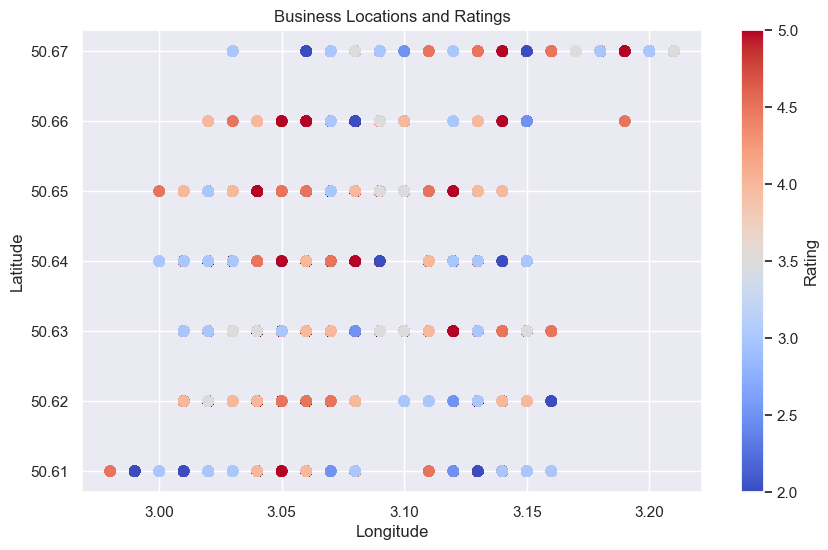

In [577]:
import matplotlib.pyplot as plt

# Create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(data_joined_new['Longitude'], data_joined_new['Latitude'], c=data_joined_new['Rating'], cmap='coolwarm', s=50)
plt.title('Business Locations and Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Rating')
plt.show()

In [445]:
import pandas as pd
import statsmodels.api as sm
import seaborn
seaborn.set()

y = data_joined_new['Total Bikes']
x1 = data_joined_new[['Latitude', 'Longitude', 'Rating']]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [446]:
results.summary()

c:\Users\franc\anaconda3.9\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Bikes   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -2.665e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               1.00
Time:                        06:18:11   Log-Likelihood:             1.9890e+06
No. Observations:               79940   AIC:                        -3.978e+06
Df Residuals:                   79936   BIC:                        -3.978e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0000   5.44e-11   3.68e+11      0.000      20.000      20.000
Latitude   -7.461e-13   1.08e-12     -0.691      0.489   -2.86e-12    1.37e-12
Longitude    4.05e-13   4.26e-13      0.951      0.342    -4.3e-13    1.24e-12
Rating      8.327e-16   2.07e-14      0.040      0.968   -3.98e-14    4.14e-14
==============================================================================
Omnibus:                     8612.166   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12846.150
Skew:                          -0.812   Prob(JB):                         0.00
Kurtosis:                       4.104   Cond. No.                     2.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Explain the initial pattern or relationship you discoved through this visualization.

### DATABASE

##### CREATE SQLITE DATABASE
Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [534]:
# Import required library
import sqlite3
import pandas as pd

In [535]:
#import sqlite3
# connection = sqlite3.connect('combined_df.sqlite')

# Connect to the SQLite database, hence database is created (it will be created if it doesn't exist)
db_path = r'C:\Code\Project_Stat_Model_DataFrame_Store\Project_CB.db'
conn = sqlite3.connect(db_path)

In [536]:
# Establishing a connection with the created database

conn = sqlite3.connect('Project_CB.db')


##### Data Storage

In [537]:
# read stored CityBike csv file
cb_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\cb1_df.csv')
# cb_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\city_bike_df.csv')
cb_df.head()

,Station Name,Latitude,Longitude,Total Bikes,ll
0,PARVIS ROTTERDAM,50.637709,3.077478,20,"50.637709,3.077478"
1,ROMARIN,50.645430,3.075116,27,"50.64543,3.075116"
2,RUE CHAMBORD,50.629720,3.133873,0,"50.62972,3.133873"
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12,"50.6875,3.1585592"
4,FAUBOURG D'ARRAS,50.614052,3.062195,16,"50.614052,3.062195"


In [538]:
cb_df.shape

(289, 5)

In [539]:
# Store citybikes dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

cb_df.to_sql('cb_df_data', conn, if_exists='replace', index=False)

289

In [540]:
# read stored foursquare csv file

fsq_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\fsq1_df.csv')
fsq_df.head()

,Foursquare ID,Categories,Distance,Latitude,Longitude,Address,Country,Locality,ll
0,52580520498e7287e120ec20,"Café, Coffee Shop, Restaurant",817,50.633326,3.068203,151 rue de Paris,FR,Lille,"50.637709,3.077478"
1,5aec3daabed483002cddc5f1,"Bar, Café, Sandwich Spot",933,50.640054,3.065019,16 bis place du Lion d'Or,FR,Lille,"50.637709,3.077478"
2,54bfa53d498eab9b0dc63806,French Restaurant,796,50.636692,3.065591,72- 74 rue Pierre Mauroy,FR,Lille,"50.637709,3.077478"
3,4bf3de1bcad2c9286f359b99,"Bar, Brewery, French Restaurant",938,50.637617,3.063970,33 place du Théâtre,FR,Lille,"50.637709,3.077478"
4,5d37273d051c210007e9ed40,"Restaurant, Hotel",479,50.638964,3.070887,97 place Saint Hubert,FR,Lille,"50.637709,3.077478"


In [541]:
fsq_df.shape

(2890, 9)

In [542]:
# Store foursquare dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

fsq_df.to_sql('fsq_df_data', conn, if_exists='replace', index=False)

2890

In [543]:
# read stored Yelp csv file

yelp_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\yelp1.0_df.csv')
yelp_df.head()

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,ll
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,"50.63599,3.13566"
1,ULt6A2p3HVGKBktjSvUENA,"Coffee & Tea, Breakfast & Brunch",816.651871,50.633335,3.068176,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,"50.63599,3.13566"
2,HkBF2Uamk_QnqdOkDi4P5w,French,115.089029,50.636683,3.077263,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,"50.63599,3.13566"
3,8wp3JtP0iZkgrMmpmKtdqQ,"Steakhouses, Barbeque",628.168916,50.635500,3.069280,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,"50.63599,3.13566"
4,Yg0jsBdq8DynRkDlmksADQ,Greek,937.097725,50.642810,3.066900,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,"50.63599,3.13566"


In [544]:
yelp_df.shape

(10668, 10)

In [545]:
# Store Yelp dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

yelp_df.to_sql('yelp_df_data', conn, if_exists='replace', index=False)

10668

In [546]:
# read stored Combined csv file

combined_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\comb2_sql_df.csv')

combined_df.head()

,Unnamed: 0,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [547]:
combined_df.shape

(93700, 15)

In [548]:
# Check the column names in the DataFrame
print(combined_df.columns)


Index(['Unnamed: 0', 'Yelp ID', 'Categories', 'Distance', 'Latitude',
       'Longitude', 'Address', 'Foursquare ID', 'City', 'Name', 'Rating', 'll',
       'Country', 'Station Name', 'Total Bikes'],
      dtype='object')


In [549]:
combined_dfx  = combined_df[['Yelp ID', 'Categories', 'Distance', 'Latitude', 'Longitude', 'Address', 'Foursquare ID', 'City', 'Name', 'Rating', 'll', 'Country', 'Station Name', 
                               'Total Bikes']]

combined_dfx

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93695,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
93696,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
93697,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
93698,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [550]:
# Store combined dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

combined_dfx.to_sql('combined_dfx_data', conn, if_exists='replace', index=False)

93700

In [551]:
# Close database connection

conn.close()

In [552]:
combined_dfx

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93695,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",53a41003498e34ef9a4466ae,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
93696,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",5a625176f8cbd43a197a664b,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
93697,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",51496a916e0d4145625ffa31,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20
93698,LRSvPmJ6fHJBSqLqy0WPHg,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",4e74ee1e45ddd4323f822924,Villeneuve-d'Ascq,Mercedes Café,3.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [553]:
# Save a copy
combined_dfx.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combsql_df.csv')


In [554]:
# read stored csv file

comb_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combsql_df.csv')
comb_df.head()

,Unnamed: 0,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [555]:
comb_df.shape

(93700, 15)

In [556]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93700 entries, 0 to 93699
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     93700 non-null  int64  
 1   Yelp ID        93700 non-null  object 
 2   Categories     93700 non-null  object 
 3   Distance       93700 non-null  float64
 4   Latitude       93700 non-null  float64
 5   Longitude      93700 non-null  float64
 6   Address        93700 non-null  object 
 7   Foursquare ID  93700 non-null  object 
 8   City           93700 non-null  object 
 9   Name           93700 non-null  object 
 10  Rating         93700 non-null  float64
 11  ll             93700 non-null  object 
 12  Country        93700 non-null  object 
 13  Station Name   93700 non-null  object 
 14  Total Bikes    93700 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 10.7+ MB


##### VALIDATE DATABASE
Look at the data before and after the join to validate your data.

In [557]:
# Import libraries

import sqlite3
import pandas as pd

# Connect to database
db_path = r'C:\Code\Project_Stat_Model_DataFrame_Store\Project_CB.db'
conn = sqlite3.connect(db_path)  

In [558]:
# Establishing a connection with the created database

conn = sqlite3.connect('Project_CB.db')

In [559]:
# Retrieve the data from the database using a SQL query
query = "SELECT * FROM yelp_df_data LIMIT 5"  
dfylp_from_db = pd.read_sql_query(query, conn)

print(dfylp_from_db)

                  Yelp ID                        Categories    Distance  \
0  rLOYRsuqZTd6ESYkG1dEmg                            French  136.078044   
1  ULt6A2p3HVGKBktjSvUENA  Coffee & Tea, Breakfast & Brunch  816.651871   
2  HkBF2Uamk_QnqdOkDi4P5w                            French  115.089029   
3  8wp3JtP0iZkgrMmpmKtdqQ             Steakhouses, Barbeque  628.168916   
4  Yg0jsBdq8DynRkDlmksADQ                             Greek  937.097725   

    Latitude  Longitude                                            Address  \
0  50.636488   3.077348  Hôtel Casino Barrière de Lille, 777 bis pont d...   
1  50.633335   3.068176              151 rue de Paris, 59800 Lille, France   
2  50.636683   3.077263  Hôtel Casino Barrière de Lille, 777 bis pont d...   
3  50.635500   3.069280            13 rue Sainte-Anne, 59800 Lille, France   
4  50.642810   3.066900                86 rue de Gand, 59000 Lille, France   

    City                 Name  Rating                ll  
0  Lille  La Terrasse 

In [560]:
# Retrieve the data from the database using a SQL query
query = "SELECT * FROM fsq_df_data LIMIT 5"  
dfsq_from_db = pd.read_sql_query(query, conn)

print(dfsq_from_db)

              Foursquare ID                       Categories  Distance  \
0  52580520498e7287e120ec20    Café, Coffee Shop, Restaurant       817   
1  5aec3daabed483002cddc5f1         Bar, Café, Sandwich Spot       933   
2  54bfa53d498eab9b0dc63806                French Restaurant       796   
3  4bf3de1bcad2c9286f359b99  Bar, Brewery, French Restaurant       938   
4  5d37273d051c210007e9ed40                Restaurant, Hotel       479   

    Latitude  Longitude                    Address Country Locality  \
0  50.633326   3.068203           151 rue de Paris      FR    Lille   
1  50.640054   3.065019  16 bis place du Lion d'Or      FR    Lille   
2  50.636692   3.065591   72- 74 rue Pierre Mauroy      FR    Lille   
3  50.637617   3.063970        33 place du Théâtre      FR    Lille   
4  50.638964   3.070887      97 place Saint Hubert      FR    Lille   

                   ll  
0  50.637709,3.077478  
1  50.637709,3.077478  
2  50.637709,3.077478  
3  50.637709,3.077478  
4  50.63

In [561]:
# Retrieve the data from the database using a SQL query
query = "SELECT * FROM combined_dfx_data LIMIT 5"  
cmbdfx_from_db = pd.read_sql_query(query, conn)

print(cmbdfx_from_db)

                  Yelp ID Categories  Distance  Latitude  Longitude  \
0  rLOYRsuqZTd6ESYkG1dEmg     French    136.08     50.64       3.08   
1  rLOYRsuqZTd6ESYkG1dEmg     French    136.08     50.64       3.08   
2  rLOYRsuqZTd6ESYkG1dEmg     French    136.08     50.64       3.08   
3  rLOYRsuqZTd6ESYkG1dEmg     French    136.08     50.64       3.08   
4  rLOYRsuqZTd6ESYkG1dEmg     French    136.08     50.64       3.08   

                                             Address  \
0  Hôtel Casino Barrière de Lille, 777 bis pont d...   
1  Hôtel Casino Barrière de Lille, 777 bis pont d...   
2  Hôtel Casino Barrière de Lille, 777 bis pont d...   
3  Hôtel Casino Barrière de Lille, 777 bis pont d...   
4  Hôtel Casino Barrière de Lille, 777 bis pont d...   

              Foursquare ID   City                 Name  Rating  \
0  509954d6e4b062b9e44f4a05  Lille  La Terrasse du Parc     4.0   
1  5bfd2632829b0c002c26ee69  Lille  La Terrasse du Parc     4.0   
2  4c4ebd92ea24c9b635a12016  Lille 

In [562]:
# Close connection
conn.close()


In [566]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('Project_CB.db')
cursor = conn.cursor()

# 1. Schema Validation
# Define your expected schema and compare it to the database schema

# 2. Data Type Validation
# Check that data types match your expectations

# 3. Unique Constraint Validation
cursor.execute("SELECT COUNT(*) FROM yelp_df_data GROUP BY 'Yelp ID' HAVING COUNT(*) > 1;")
duplicates = cursor.fetchall()
if duplicates:
    print("Duplicate values found in unique columns:", duplicates)

# 4. Foreign Key Constraint Validation
# Ensure that foreign key relationships are maintained

# 5. Custom Data Validation Rules
# Write custom SQL queries to check for specific rules

# 6. Referential Integrity
# Verify that all references between tables are valid

# Close the database connection
conn.close()


Duplicate values found in unique columns: [(10668,)]
